<a href="https://colab.research.google.com/github/SecureGitWire/GoogleCollabeTensorflowDev/blob/main/NeuralNetworkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Neural Network Classification

* Binary Classification
* Multi Class Classification
* Multi Label Classification

## Create Data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples

n_samples = 1000

# Create circles

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Visualize Data

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


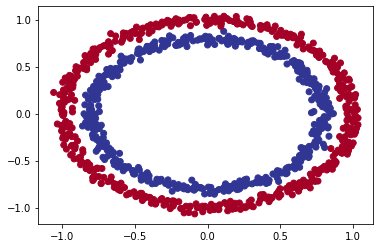

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [6]:
# Check the spaes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(x), len(y)

(1000, 1000)

In [8]:
# View examples of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modeling

Create Model
Compile Model
Fit Model
Evaluate Model
Tune
Evaluate

In [9]:
import tensorflow as tf

In [10]:
#set the random seed - for reproducability
tf.random.set_seed(42)

# 1. Create a model
classification_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
classification_model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. Fit the model
classification_model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 4.5122 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 3.2919 - accuracy: 0.5200
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7854 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7166 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.4960


In [11]:
# Train longer to improve model
classification_model_1.fit(x,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.4980
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.4980
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4660
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4860
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4720
Epoch 6/200
32/32 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.5150
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4770
Epoch 9/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 10/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 11/

In [12]:
classification_model_1.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [13]:
## Improve Model
# Set Random Seed
tf.random.set_seed(42)
# Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# Compile Model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
# Fit Model
model_2.fit(x,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 6.1183 - accuracy: 0.4750
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 6.5844 - accuracy: 0.4500
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 11/

In [14]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Set Random Seed
# Create Model
# Compile Model
# Fit Model

In [17]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [18]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [19]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [20]:
# Model is guessing with a 50 percent accuracy and predicting a binary classification problem correctly predicting one compared to two.

## Improve Model

In [21]:
#tf.keras.Input(shape=(2,1,1)),
#tf.keras.Flatten(input_shape=(2,1,1)),
#relu
#softmax

# Set Random Seed
tf.random.set_seed(42)
# Create Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), #added 100 dense neurons
    tf.keras.layers.Dense(10), #add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])
# Compile Model
model_3.compile(
    loss=tf.keras.losses.BinaryFocalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Fit Model
model_3.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 1.8983 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3915 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.5000
Epoch 11/

In [22]:
model_3.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.5030


[0.17443382740020752, 0.503000020980835]

In [23]:
model_3.predict(x)

32/32 [==============================] - 0s 1ms/step


array([[0.47939667],
       [0.5234134 ],
       [0.52525604],
       [0.5154789 ],
       [0.48288015],
       [0.5179222 ],
       [0.5048604 ],
       [0.47846657],
       [0.5013822 ],
       [0.5091318 ],
       [0.51655304],
       [0.48792377],
       [0.5080625 ],
       [0.4771405 ],
       [0.47977802],
       [0.4909619 ],
       [0.52622354],
       [0.49325737],
       [0.5239727 ],
       [0.5155262 ],
       [0.484246  ],
       [0.52124697],
       [0.4960057 ],
       [0.48005882],
       [0.5294424 ],
       [0.5289635 ],
       [0.49692136],
       [0.47533783],
       [0.48906532],
       [0.47871426],
       [0.50510275],
       [0.51200193],
       [0.50411123],
       [0.47091776],
       [0.49765182],
       [0.5270603 ],
       [0.5199924 ],
       [0.4908453 ],
       [0.48891017],
       [0.48173463],
       [0.51405925],
       [0.4944931 ],
       [0.5179812 ],
       [0.4746726 ],
       [0.5219946 ],
       [0.5254217 ],
       [0.4824227 ],
       [0.497

In [24]:
# Visualize Model Predictions -- Create Function -- plot_decision_boundary()

# Take Trained model, features(x) and labels(y)
# Create Mesh Grid
# Make Predictions across mesh grid
# Plot predictions and line between zones where each class falls 1 or 0

# This function was created using two resources
# https://cs231n.github.io/neural-networks-case-study/
# https://github.com/Mahnoor123-Fatima/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb

import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(trained_model,
                           x,
                           y):
  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

  #Create Mesh Grid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D Arrays together

  # Make Predictions
  y_pred = trained_model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Multiclass Classification")
    # Reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Binary Classification


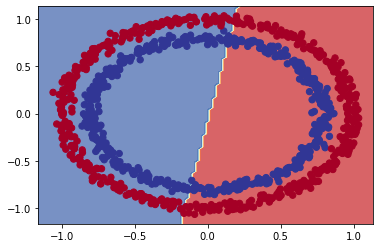

In [25]:
# Check predictions model is making
plot_decision_boundary(model_3,
                       x,
                       y)

In [26]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [27]:
# Determine if model can be used for a regression problem

tf.random.set_seed(42)

# Create Regression Data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

x_regression[:10], y_regression[:10]

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145], dtype=int32)>)

In [28]:
x_regression.shape, y_regression.shape

(TensorShape([200]), TensorShape([200]))

In [29]:
#Split Training Data into Training and Test Set
x_regression_train = x_regression[:150]
x_regression_test = x_regression[150:]

y_regression_train = x_regression[:150]
y_regression_test = x_regression[150:]

# Fit Model to the regression data

x_regression_train = tf.expand_dims(x_regression_train, axis=-1)
x_regression_test = tf.expand_dims(x_regression_test, axis=-1)

In [30]:
x_regression_train[:10]

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 0],
       [ 5],
       [10],
       [15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45]], dtype=int32)>

In [31]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
model_4.fit(x_regression_train, y_regression_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 457.7376 - mae: 457.7376
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 386.4662 - mae: 386.4662
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 319.2714 - mae: 319.2714
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 250.0741 - mae: 250.0741
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 177.2976 - mae: 177.2976
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 96.6778 - mae: 96.6778
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 21.2541 - mae: 21.2541
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 37.5219 - mae: 37.5219
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 24.7236 - mae: 24.7236
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 9.5909 - mae: 9.5909
Epoch 11/100
5/5 [==============================] -

In [32]:
# Make Predictions with our trained model
y_pred = model_4.predict(x_regression_test)
y_pred[:10]

2/2 [==============================] - 0s 4ms/step


array([[755.46204],
       [760.4981 ],
       [765.5347 ],
       [770.5711 ],
       [775.6077 ],
       [780.644  ],
       [785.6804 ],
       [790.71674],
       [795.7533 ],
       [800.78973]], dtype=float32)

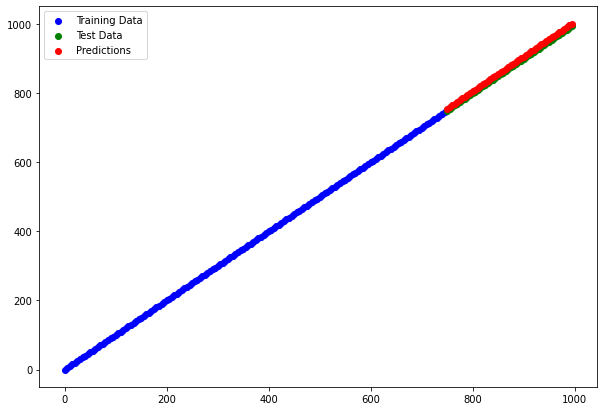

In [33]:
# Plot the Model Predictions with regression data
plt.figure(figsize=(10,7))
plt.scatter(x_regression_train, y_regression_train, c="b", label="Training Data")
plt.scatter(x_regression_test, y_regression_test, c="g", label="Test Data")
plt.scatter(x_regression_test, y_pred, c="r", label="Predictions")
plt.legend();

#Non Linearity

In [34]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
history = model_5.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3636 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3616 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3603 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3423 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3284 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3274 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3263 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3262 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3252 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3242 - accuracy: 0.4910
Epoch 11/

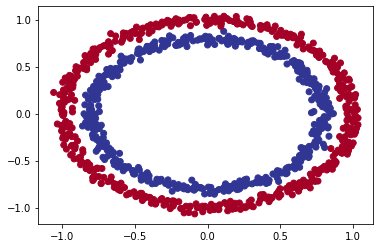

In [35]:
# Check Data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
Binary Classification


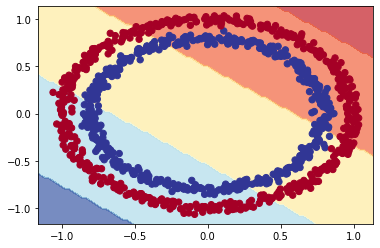

In [36]:
# Plot Decision Boundary for latest model
plot_decision_boundary(model_5,
                       x,
                       y)

In [37]:
# Build Model with Non Linear Activation Function

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
model_6.fit(x,y,epochs=850)

Epoch 1/850
32/32 [==============================] - 1s 2ms/step - loss: 1.2393 - accuracy: 0.5000
Epoch 2/850
32/32 [==============================] - 0s 2ms/step - loss: 1.0101 - accuracy: 0.4360
Epoch 3/850
32/32 [==============================] - 0s 2ms/step - loss: 0.9220 - accuracy: 0.3620
Epoch 4/850
32/32 [==============================] - 0s 2ms/step - loss: 0.8695 - accuracy: 0.3790
Epoch 5/850
32/32 [==============================] - 0s 2ms/step - loss: 0.8353 - accuracy: 0.3480
Epoch 6/850
32/32 [==============================] - 0s 2ms/step - loss: 0.8106 - accuracy: 0.3100
Epoch 7/850
32/32 [==============================] - 0s 2ms/step - loss: 0.7923 - accuracy: 0.3400
Epoch 8/850
32/32 [==============================] - 0s 2ms/step - loss: 0.7779 - accuracy: 0.3210
Epoch 9/850
32/32 [==============================] - 0s 2ms/step - loss: 0.7654 - accuracy: 0.3320
Epoch 10/850
32/32 [==============================] - 0s 2ms/step - loss: 0.7552 - accuracy: 0.3790
Epoch 11/

In [38]:
y_pred_2 = model_6.predict(x)

32/32 [==============================] - 0s 1ms/step


313/313 [==============================] - 0s 1ms/step
Binary Classification


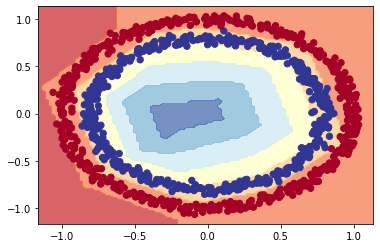

In [39]:
plot_decision_boundary(model_6,
                       x,
                       y)

In [40]:
# Set Random Seed for Reproducibility
tf.random.set_seed(42)

# 1. Create Model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
# 2. Compile Model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
# 3. Fit Model
model_7.fit(x,y,epochs=1000)

Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5010
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5560
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5080
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5200
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5210
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5190
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5300
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5230
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5300
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5320

313/313 [==============================] - 0s 1ms/step
Binary Classification


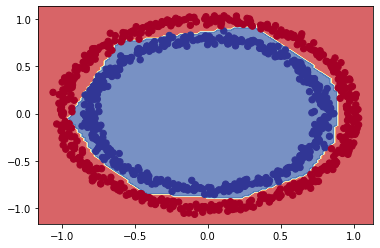

In [41]:
plot_decision_boundary(model_7,
                       x,
                       y)

In [42]:
# Create a test tensor
test = tf.cast(tf.range(-10, 10), tf.float32)

In [43]:
test

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

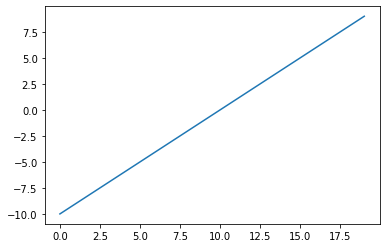

In [44]:
#Visualize test tensor
plt.plot(test);

In [45]:
sigmoid_test = tf.keras.activations.sigmoid(test)

In [46]:
sigmoid_test

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105123e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

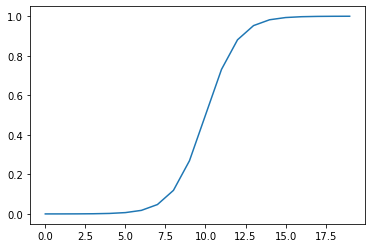

In [47]:
plt.plot(sigmoid_test);

In [48]:
def sigmoid_function(x):
  return 1/(1 + tf.exp(-x))

In [49]:
sigmoid_function_test = sigmoid_function(test)

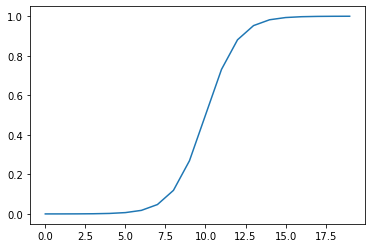

In [50]:
plt.plot(sigmoid_function_test);

In [51]:
def relu_function(x):
  return tf.maximum(0, x)

In [52]:
relu_function_test = relu_function(test)
relu_function_test

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

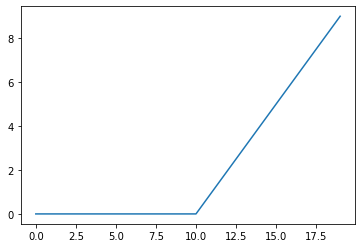

In [53]:
plt.plot(relu_function_test);

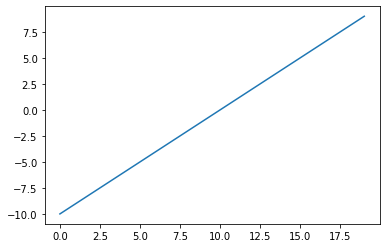

In [54]:
plt.plot(test);

In [55]:
linear_function_test = tf.keras.activations.linear(test)
linear_function_test

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

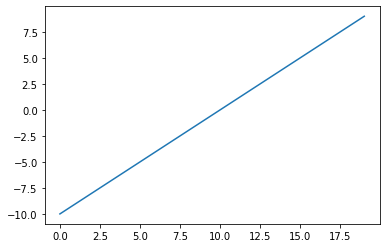

In [56]:
plt.plot(linear_function_test);

#Evaluating and improving our classifications
Create a Training and Test Set

In [57]:
#Check how many examples in the dataset
len(x)

1000

In [58]:
# Split into train and test sets
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [59]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)
history = model_8.fit(x_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5038
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6325
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6313
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.7475
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.6963
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7887
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.8763
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.8975
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.9550
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.9812
Epoch 11/50
25/25 [

313/313 [==============================] - 0s 1ms/step
Binary Classification


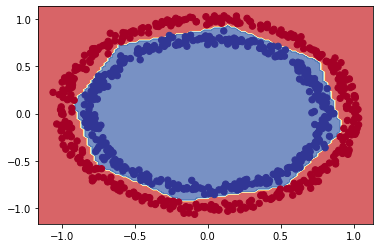

In [60]:
plot_decision_boundary(model_8,x_train,y_train)

In [61]:
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 1.0000


[0.015102572739124298, 1.0]

313/313 [==============================] - 0s 1ms/step
Binary Classification
313/313 [==============================] - 0s 1ms/step
Binary Classification


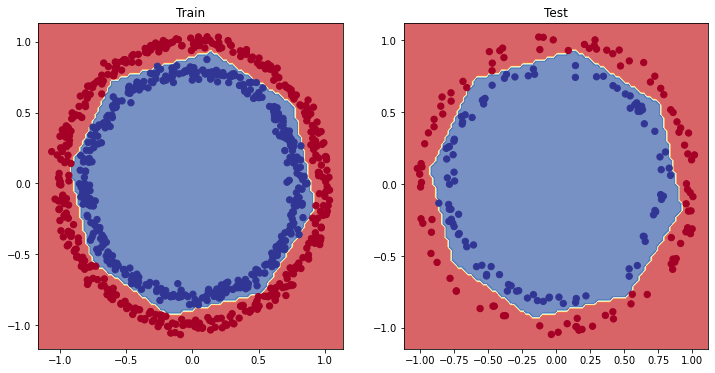

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, x_test, y_test)

In [63]:
history.history

{'loss': [0.6911593079566956,
  0.676770806312561,
  0.6639273166656494,
  0.6451881527900696,
  0.620614767074585,
  0.5839349627494812,
  0.5385372638702393,
  0.488850474357605,
  0.4194258749485016,
  0.3430369198322296,
  0.25986260175704956,
  0.20699219405651093,
  0.1692783385515213,
  0.14215025305747986,
  0.11654364317655563,
  0.1023927852511406,
  0.08739736676216125,
  0.07893627882003784,
  0.068942591547966,
  0.06823618710041046,
  0.05990849435329437,
  0.05663197860121727,
  0.050160814076662064,
  0.048738908022642136,
  0.04393746703863144,
  0.04245561733841896,
  0.04034707695245743,
  0.035414308309555054,
  0.03632284700870514,
  0.03670893609523773,
  0.03480214625597,
  0.034268755465745926,
  0.03250123932957649,
  0.027035458013415337,
  0.028373563662171364,
  0.027147410437464714,
  0.026964273303747177,
  0.025673119351267815,
  0.026852093636989594,
  0.0223383828997612,
  0.023287808522582054,
  0.024475498124957085,
  0.01991192065179348,
  0.02182873

In [64]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.691159,0.50375
1,0.676771,0.63250
2,0.663927,0.63125
3,0.645188,0.74750
4,0.620615,0.69625
5,0.583935,0.78875
6,0.538537,0.87625
7,0.488850,0.89750
8,0.419426,0.95500
9,0.343037,0.98125


Text(0.5, 1.0, 'Model_8 Loss Curves')

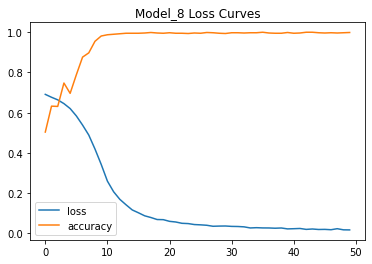

In [65]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss Curves")

## Finding the best learning rate

Find the ideal learning rate. Learning Rate callback, functionality that you can add to your model while it's training.

Build an additional model

Modified Loss Curve Plot

In [66]:
#Set Random Seed
tf.random.set_seed(42)

#Create Model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),

])
model_9.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_9.fit(x_train, y_train, epochs=100, callbacks=lr_scheduler)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5075 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5075 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [67]:
history.history

{'loss': [0.6963174939155579,
  0.6961644887924194,
  0.6960193514823914,
  0.6958426833152771,
  0.6956825256347656,
  0.6955319046974182,
  0.6952906847000122,
  0.6951146721839905,
  0.6949187517166138,
  0.6946704983711243,
  0.6944667100906372,
  0.6942317485809326,
  0.693905234336853,
  0.6935787200927734,
  0.6933084726333618,
  0.6928470730781555,
  0.6925522685050964,
  0.6920541524887085,
  0.6916735172271729,
  0.6911402940750122,
  0.6905019283294678,
  0.6897526383399963,
  0.6888375282287598,
  0.6876160502433777,
  0.6862191557884216,
  0.684683084487915,
  0.6831352710723877,
  0.680370569229126,
  0.6783868670463562,
  0.6742551326751709,
  0.6708055734634399,
  0.6637726426124573,
  0.6538867354393005,
  0.6371991634368896,
  0.6109033823013306,
  0.5902154445648193,
  0.5431907773017883,
  0.4886866807937622,
  0.4429052770137787,
  0.3884105682373047,
  0.3382740914821625,
  0.27895617485046387,
  0.24505090713500977,
  0.22101886570453644,
  0.1942862719297409,
  

In [68]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.696317,0.50875,0.000100
1,0.696164,0.50750,0.000112
2,0.696019,0.50750,0.000126
3,0.695843,0.50250,0.000141
4,0.695683,0.50500,0.000158
...,...,...,...
95,0.775424,0.46375,5.623413
96,0.802573,0.50125,6.309574
97,0.958758,0.49625,7.079458
98,0.939441,0.49125,7.943282


<Axes: >

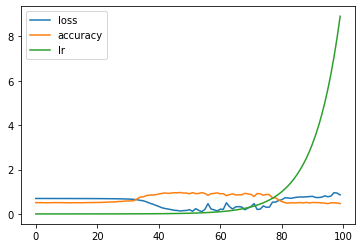

In [69]:
pd.DataFrame(history.history).plot()

In [70]:
# Plot learning rate compared to the loss -- 100 values of learning rate - learning rate scheduler
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

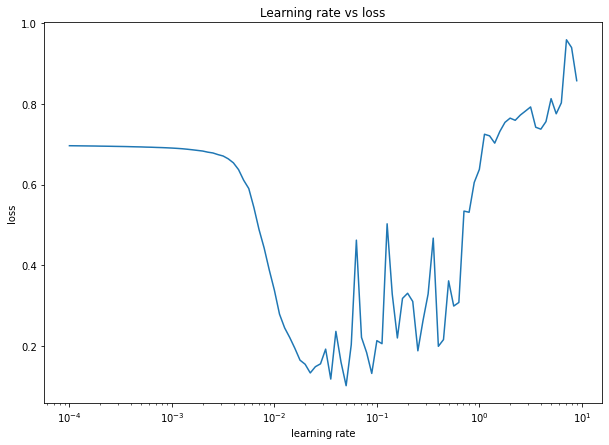

In [71]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss");

# 10^-2 = 0.01, 10^-1 = 0.1

In the graph above the optimal learning rate for the model above would fall between 10^-2 to 10^-1 which would follow a range between 0.01 - 0.1
0.01 - 0.1 

Optimal learning rate in the example provided above would be or fall in between 0.01 - 0.02

The ideal learning rate for the model above would be smaller that the lowest point on the curve. 

In [72]:
# Examples of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [73]:
# Examples of other typical learning rate values
1e-0, 1e-1, 1e-2, 10**-4

(1.0, 0.1, 0.01, 0.0001)

In [75]:
#Build a Model using the Train Datset and modify the learning rate to 0.02 to see if the model performance has changed
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_10.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

model_10.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 3s 3ms/step - loss: 0.6889 - accuracy: 0.5537
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6025
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.6612
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5879 - accuracy: 0.7250
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7912
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3768 - accuracy: 0.9050
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.9538
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9638
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1301 - accuracy: 0.9862
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.9900
Epoch 11/25
25/25 [

In [77]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9900


[0.024602899327874184, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
Binary Classification
313/313 [==============================] - 1s 2ms/step
Binary Classification


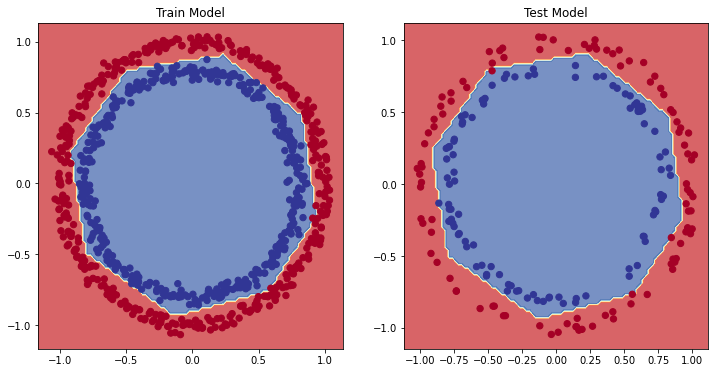

In [81]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Model")
plot_decision_boundary(model_10, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test Model")
plot_decision_boundary(model_10, x_test, y_test);

# More Classification Evaluation Methods

Accuracy

Precision

Recall

F1 Score

Confusion Matrix

Specificity

Classification Report - SciKit Learn

In [90]:
# Check Accuracy of our Model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model Loss: {loss}")
print(f"Model Accuracy: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9900
Model Loss: 0.024602899327874184
Model Accuracy: 99.00%


#Confusion Matrix

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9900


[0.024602899327874184, 0.9900000095367432]

In [94]:
# Make Predictions
y_pred = model_10.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [95]:
# Create a confusion matrix
confusion_matrix(y_test, y_pred)

ValueError: ignored

In [117]:
confusion_matrix(y_test, tf.cast(tf.math.round(y_pred), tf.int32))

array([[100,   1],
       [  1,  98]])

In [119]:
confusion_matrix(y_test, tf.math.round(y_pred))

array([[100,   1],
       [  1,  98]])

In [120]:
len(y_pred)

200

In [107]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [106]:
y_pred[:10]

array([[9.9723077e-01],
       [9.9927765e-01],
       [9.8534888e-01],
       [9.9883878e-01],
       [9.8196045e-03],
       [8.7400788e-04],
       [9.4940007e-01],
       [4.4402266e-05],
       [9.9934769e-01],
       [6.4939591e-03]], dtype=float32)

In [111]:
9.9723077e-01

0.99723077

# Our Predictions array has been output in Predicition Probability Form
The Standard output from the sigmoid and or softmax activation functions

In [118]:
# Round the Predictions to the nearest integer 0 or 1 using the tf.math.round function to change the predictions from a continous output to an integer
# Use the test (y) labels with the integers from the prediction (y) labels in the scikit learn confusion matrix utility function
tf.cast(tf.math.round(y_pred, tf.int32), tf.int32)[:10]

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]], dtype=int32)>

In [141]:
confusion_matrix_dataset = confusion_matrix(y_test, tf.math.round(y_pred))
confusion_matrix_dataset

array([[100,   1],
       [  1,  98]])

In [132]:
#confusion_matrix_dataframe = pd.DataFrame({"True Positive":confusion_matrix_dataset[:, 0], "False Positive":confusion_matrix_dataset[:, 1]})
#confusion_matrix_dataframe

In [140]:
Column_labels = ["Predicted Positive", "Predicted Positive"]
Row_labels = ["Actual Positive", "Actual Negative" ]
dataframe = pd.DataFrame(confusion_matrix(y_test, tf.math.round(y_pred)),columns=Column_labels, index=Row_labels )
dataframe = dataframe.style.set_caption("Confusion Matrix")
dataframe

,Predicted Positive,Predicted Positive
Actual Positive,100,1
Actual Negative,1,98


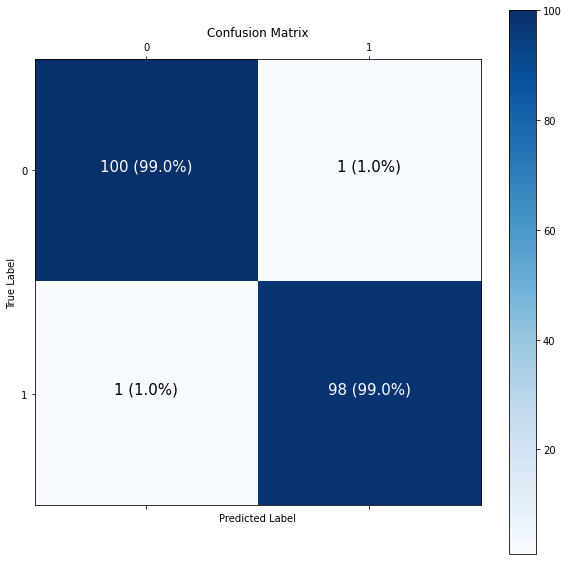

In [161]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.math.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=(10, 10))

# Create a MatrixPlot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create Classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set Threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the Confusion Matrix
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

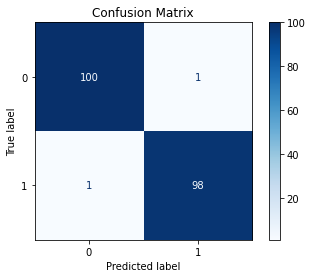

In [198]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tf.math.round(y_pred))
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
cm_display = cm_display.ax_.set_title("Confusion Matrix")
cm_display;

In [144]:
cm_norm

array([[0.99009901, 0.00990099],
       [0.01010101, 0.98989899]])

In [145]:
cm.shape

(2, 2)

#Working with a larger example ( Multiclass Classification)
When you have more than two classes it is multi classification. -- Identify Between two or more classes
An Example of Binary Classification would be making a prediction on head or tails, yes or no, 0 or 1. -- Yes and No belong to the same class
An Example of Multi Classification would be making a prediction between bananas and apples, dogs and cats, 
new york and atlanta -- State > Class(City), Fruit > Class(Fruit)


Class State

            New York
            Atlanta
            Kansas
            Albama
            Nebraska


Class Fruit

            Banana
            Apple
            Grapes

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data has been sorted and split into training and test sets

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Show the first training example
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# Identify the shape of the Training Data DataSet
train_data.shape

(60000, 28, 28)

In [6]:
# Identify the shape of the Training Labels DataSet
train_labels.shape

(60000,)

In [7]:
# Identify the shape of one sample in the Training Data Dataset.
train_data[0].shape

(28, 28)

In [8]:
# Identify the shape of one sample in the training Labels DataSet.
train_labels[0].shape

()

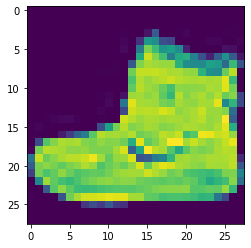

In [9]:
import matplotlib.pyplot as plt

# Plot a single sample
plt.imshow(train_data[0]);

In [10]:
train_labels[0]

9

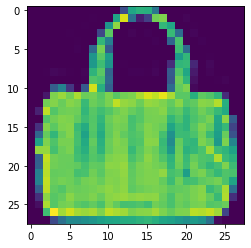

In [11]:
plt.imshow(train_data[4000]);

In [12]:
train_labels[4000]

8

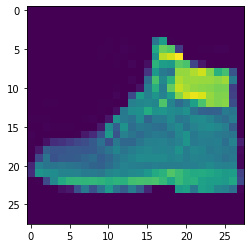

In [13]:
plt.imshow(train_data[90]);

In [14]:
train_labels[90]

9

In [86]:
# Create List to index to Training Labels to make the Labels Human Readable
Class_Names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [89]:
len(Class_Names)

10

In [90]:
Class_Names[0]

'T-Shirt/Top'

In [18]:
train_data[0].shape

(28, 28)

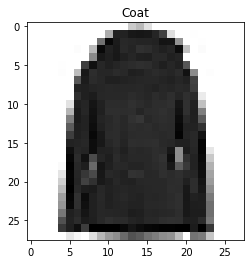

In [19]:
# Plot an Example Image and its Label
sample_index = 2000
plt.imshow(train_data[sample_index], cmap=plt.cm.binary)
plt.title(Class_Names[train_labels[sample_index]]);

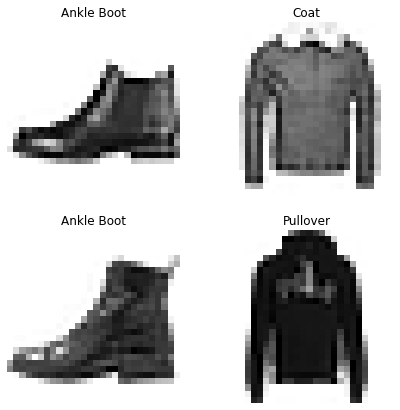

In [158]:
# Plot Multiple Random Images of Fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(Class_Names[train_labels[rand_index]])
  plt.axis(False); # Remove Ticks

#Building a multi-class Classification Model

For Multi Class Classification Model, we can create a model 
using a similar architecture as a binary classification model 
with the exception of the following parameters:
  
  
  Input Shape = Input Shape will be the shape of a sample in the training Data
                In the fashion mnist dataset each sample (image) is 28 x 28
                width X length (pixels) 28 pixels width x 28 pixels length
    example:
      train_data[0].shape
      (28, 28)
      
      **Reference** Same as number of features (Binary and Multi Class
      Classification)
                    
                    Binary Classification:
                      Same as number of features(age, height, weight, smoking, 
                      heart disease). In the circles example the number of 
                      features is x.shape = (1000, 2) the input shape would be 
                      (1000, 2) a matrix of (1000, 2) a list of 1,000 elements 
                      each containing a list of 2 elements. 2D Array
                    
                    Multi Class Classification:
                      Same as number of features in the example above each 
                      sample is (28,28), the input shape would be (28,28)
  
  Output Shape = 1 per class. In the example above the output shape would be 10
  (one per class of clothing)

  
  Loss Function = For multiclass Classification Model the loss function that 
  would be used is CategoricalCrossentropy() 
  tf.keras.losses.CategoricalCrossentropy()
  For binary Classification Model the loss function that would be used is
  BinaryCrossentropy() tf.keras.losses.BinaryCrossentropy()


  Output Activation Function = The Activation function that would be used in a 
  multi class classification model is the SoftMax Activation Function. The 
  Activation function that would be used in a binary classification model would 
  be sigmoid.

  For the Output Activation Function using one hot encoding to encode the data 
  must be used when for CategoricalCrossentropy(). If one hot encoding is not
  used for data (y) labels use SparseCategoricalCrossentropy.

In [21]:
tf.expand_dims(train_data, axis=-1).shape

TensorShape([60000, 28, 28, 1])

In [22]:
train_data.shape

(60000, 28, 28)

In [23]:
# Data needs to be flattened ()
# This converts the shape from each sample having a shape of 28X28 (28, 28) to a shape
# that represents the shape in one vector (0, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])

In [24]:
flatten_model.output_shape

(None, 784)

In [25]:
28 * 28

784

In [26]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
# Create Multi Class Classification Model
# Set Random Seed
tf.random.set_seed(42)

# 1. Create Model
multiClassification_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile Model
multiClassification_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# When presented with the following error
#   ValueError: Shapes (32,) and (32, 28, 10) are incompatible

# 3. Fit Model
non_normalized_history = multiClassification_model.fit(train_data, train_labels, epochs=100, validation_data=(test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 13s 5ms/step - loss: 2.2006 - accuracy: 0.2059 - val_loss: 1.9590 - val_accuracy: 0.2587
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 1.8809 - accuracy: 0.2402 - val_loss: 1.9978 - val_accuracy: 0.2176
Epoch 3/100
1875/1875 [==============================] - 13s 7ms/step - loss: 1.7422 - accuracy: 0.2774 - val_loss: 1.6032 - val_accuracy: 0.3311
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4649 - accuracy: 0.3554 - val_loss: 1.3926 - val_accuracy: 0.3597
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3418 - accuracy: 0.4022 - val_loss: 1.2592 - val_accuracy: 0.4562
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2284 - accuracy: 0.4654 - val_loss: 1.2064 - val_accuracy: 0.4964
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1587 - accuracy: 0.5077 - val_loss: 1.1606 - val_

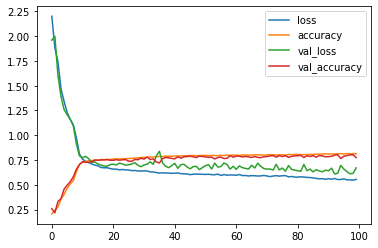

In [6]:
import pandas as pd
pd.DataFrame(non_normalized_history.history).plot();

In [7]:
multiClassification_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [8]:
multi_classification_y_pred = multiClassification_model.predict(test_data)
multi_classification_y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [9]:
train_data.min(), train_data.max()

(0, 255)

In [10]:
# Data Normalization is a common good practive for optimal model performance
# The training dataset can be normalized dividing by the maximumm
train_data_normalized = train_data / 255.0
test_data_normalized = test_data / 255.0

In [11]:
train_data_normalized.min(), train_data_normalized.max()

(0.0, 1.0)

In [310]:
# Create Multi Class Classification Model
# Set Random Seed
tf.random.set_seed(42)

# 1. Create Model
multiClassification_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile Model
multiClassification_model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics=["accuracy"]
)

# When presented with the following error
#   ValueError: Shapes (32,) and (32, 28, 10) are incompatible

# 3. Fit Model
normalized_history = multiClassification_model_2.fit(train_data_normalized, train_labels, epochs=100, validation_data=(test_data_normalized, test_labels))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6917 - accuracy: 0.7500 - val_loss: 0.5456 - val_accuracy: 0.8119
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4988 - accuracy: 0.8236 - val_loss: 0.5255 - val_accuracy: 0.8130
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4760 - accuracy: 0.8314 - val_loss: 0.5165 - val_accuracy: 0.8129
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4645 - accuracy: 0.8356 - val_loss: 0.5122 - val_accuracy: 0.8220
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4577 - accuracy: 0.8383 - val_loss: 0.4905 - val_accuracy: 0.8267
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4496 - accuracy: 0.8407 - val_loss: 0.5315 - val_accuracy: 0.8078
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4464 - accuracy: 0.8419 - val_loss: 0.4942 - val_ac

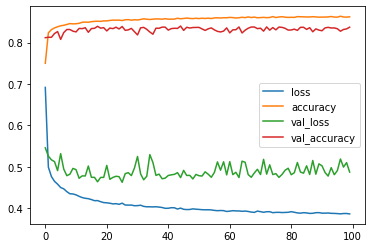

In [311]:
pd.DataFrame(normalized_history.history).plot();

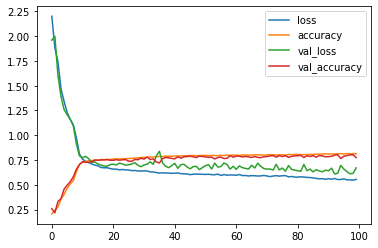

In [298]:
pd.DataFrame(non_normalized_history.history).plot();

# When evaluating models good practice is to evaluate same data different model architecture or same model architect different data

#Finding the best learning rate

In [35]:
# Set Random Seed
tf.random.set_seed(42)

# 1. Create Model
lrs_multiClassification_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
# 2. Compile Model
lrs_multiClassification_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Create Learning Rate Scheduler Callback
lrs_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. Fit Model -- Create a Learning Rate Callback Scheduler to find the ideal learning rate
find_lr_history = lrs_multiClassification_model.fit(train_data_normalized, 
                                                    train_labels, 
                                                    epochs=40, 
                                                    validation_data=(test_data_normalized, test_labels),
                                                    callbacks=[lrs_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5015 - accuracy: 0.4776 - val_loss: 0.9992 - val_accuracy: 0.6676 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7816 - accuracy: 0.7457 - val_loss: 0.6888 - val_accuracy: 0.7725 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6126 - accuracy: 0.7942 - val_loss: 0.5966 - val_accuracy: 0.7990 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5527 - accuracy: 0.8139 - val_loss: 0.5516 - val_accuracy: 0.8103 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5181 - accuracy: 0.8241 - val_loss: 0.5258 - val_accuracy: 0.8174 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4937 - accuracy: 0.8317 - val_loss: 0.5116 - val_accuracy: 0.8241 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

In [39]:
tf.range(40)

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int32)>

In [43]:
tf.range(40)/20

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])>

In [44]:
tf.range(45)/20

<tf.Tensor: shape=(45,), dtype=float64, numpy=
array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 ])>

In [45]:
tf.range(100)/20

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95])>

In [37]:
# Plot Learning Rate Decay Curve
import numpy as np
import matplotlib.pyplot as plt

lrs = (10**(tf.range(40)/20))
lrs

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509])>

In [34]:
1e-4 * 100

0.01

In [301]:
1e-4, 1e-3, 1e-2, 1e-1

(0.0001, 0.001, 0.01, 0.1)

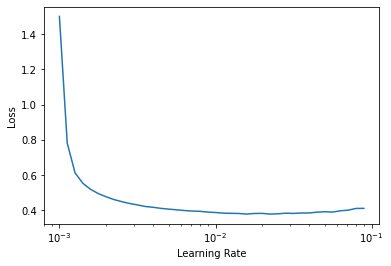

In [299]:
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss");

In [48]:
#Ideal Learning Rate
1e-3

0.001

# Evaluating our multi-class Classification model

Evaluate using a confusion matrix
Assess some of its predictions
Improve its results -- training it for longer, changing the architecture

In [74]:
multiClassification_y_pred_2 = multiClassification_model_2.predict(test_data_normalized)

313/313 [==============================] - 1s 2ms/step


In [75]:
multiClassification_y_pred_2[:5]

array([[4.2128583e-08, 1.3643862e-10, 6.5525457e-10, 1.4938296e-08,
        3.4199799e-10, 8.1977798e-03, 4.6933064e-08, 4.8222445e-02,
        8.4367013e-05, 9.4349533e-01],
       [1.7374835e-10, 2.8847131e-08, 9.9772936e-01, 7.0084855e-10,
        2.2503827e-03, 5.1897162e-23, 2.0268668e-05, 0.0000000e+00,
        1.1944693e-08, 1.8431859e-24],
       [1.0045585e-05, 9.9996072e-01, 1.9476374e-06, 2.5674894e-05,
        1.1497561e-06, 6.0337381e-21, 6.9340359e-08, 4.5759803e-27,
        3.3419056e-07, 1.3861224e-15],
       [1.1239543e-05, 9.9913442e-01, 1.2774583e-05, 8.2884921e-04,
        9.1482343e-06, 4.2636846e-16, 8.5128320e-08, 9.7214544e-20,
        3.4749546e-06, 1.4234048e-12],
       [3.7011132e-01, 1.4161247e-06, 3.0076401e-02, 2.1866295e-02,
        2.0906937e-03, 4.5721360e-15, 5.7518953e-01, 1.9447722e-23,
        6.6428701e-04, 2.1804392e-12]], dtype=float32)

In [76]:
multiClassification_y_pred_1 = multiClassification_model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [77]:
multiClassification_y_pred_1[:5]

array([[6.66795834e-18, 9.43088892e-24, 1.84021062e-07, 1.09748915e-29,
        1.99586893e-26, 1.69562120e-02, 1.12649177e-25, 2.87963271e-01,
        3.15749162e-07, 6.95080042e-01],
       [6.34994544e-03, 1.19448116e-03, 6.72617912e-01, 2.39713350e-03,
        1.79359213e-01, 3.20667723e-08, 1.38050079e-01, 3.69502598e-34,
        3.12075281e-05, 2.66397495e-28],
       [1.77629623e-12, 9.99955356e-01, 1.85061827e-11, 4.41610755e-05,
        5.21659786e-07, 0.00000000e+00, 1.04489715e-10, 0.00000000e+00,
        8.56954872e-12, 0.00000000e+00],
       [1.20060288e-14, 9.99992549e-01, 1.38710427e-13, 7.37467326e-06,
        4.48521185e-08, 0.00000000e+00, 1.25993215e-12, 0.00000000e+00,
        5.82119598e-14, 0.00000000e+00],
       [3.56823146e-01, 1.38885851e-04, 4.76659276e-02, 1.25958361e-02,
        2.19365228e-02, 3.53630480e-09, 5.60807228e-01, 6.76697480e-16,
        3.23968816e-05, 0.00000000e+00]], dtype=float32)

In [78]:
y_probs = multiClassification_model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [80]:
y_probs[0]

array([6.66795834e-18, 9.43088892e-24, 1.84021062e-07, 1.09748915e-29,
       1.99586893e-26, 1.69562120e-02, 1.12649177e-25, 2.87963271e-01,
       3.15749162e-07, 6.95080042e-01], dtype=float32)

# Make Predicitions using the same kind of data your model was trained on. Normalized Training on model with normalized data for predictions.

In [100]:
multiClassification_y_pred_2[0], tf.argmax(multiClassification_y_pred_2[0]), Class_Names[tf.argmax(multiClassification_y_pred_2[0])]

(array([4.2128583e-08, 1.3643862e-10, 6.5525457e-10, 1.4938296e-08,
        3.4199799e-10, 8.1977798e-03, 4.6933064e-08, 4.8222445e-02,
        8.4367013e-05, 9.4349533e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [101]:

Class_Names[tf.argmax(multiClassification_y_pred_2[0])]

'Ankle Boot'

In [98]:
Class_Names

['T-Shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [96]:
tf.argmax(multiClassification_y_pred_2[5])

<tf.Tensor: shape=(), dtype=int64, numpy=1>

# For Predictions with an output shape greater than 1 tf.argmax can be used to convert predicition probabilities to integers
# predicition probabilities with an output shape greater than 1 will be converted to the index associated with the highest probability
# test labels will contain the index associated to the sample in the train or test data set. This would apply to one hot encoding
# as in one hot encoding the index with the highest probability will contain a 1 compared to a 0.

In [318]:
# Convert all of the prediction probabilities into integers
y_preds = multiClassification_y_pred_2.argmax(axis=1)

In [319]:
# View the first 10 prediction labels -- labels indicate index from the output shape being 10
# which index is associated with the highlest prediction probability being provided for the image classification
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [320]:
for i in range(10):
  print(Class_Names[tf.argmax(multiClassification_y_pred_2[i])])

Ankle Boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker


In [321]:
test_labels.shape, y_preds.shape

((10000,), (10000,))

In [322]:
multiClassification_model_2.evaluate(test_data_normalized, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4870 - accuracy: 0.8373


[0.4869653880596161, 0.8373000025749207]

In [323]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [324]:
cm = confusion_matrix(test_labels, y_preds)

In [325]:
cm

array([[847,   2,  16,  36,   4,   0,  80,   1,  13,   1],
       [  7, 950,   7,  27,   4,   0,   2,   0,   3,   0],
       [ 20,   3, 759,   9, 113,   4,  88,   0,   4,   0],
       [ 47,  14,  12, 833,  35,   1,  42,   3,  13,   0],
       [  0,   1, 110,  33, 774,   0,  74,   0,   8,   0],
       [  0,   1,   0,   2,   0, 939,   0,  29,   3,  26],
       [175,   6,  90,  29,  67,   0, 615,   0,  18,   0],
       [  0,   0,   0,   0,   0,  31,   0, 946,   1,  22],
       [  6,   1,   8,   7,   3,   6,  10,   6, 951,   2],
       [  1,   0,   0,   0,   0,  14,   0,  54,   1, 930]])

In [326]:
cm_disp = ConfusionMatrixDisplay(cm)

In [327]:
cm_disp

# Create a Confusion Matrix

In [328]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=10):
  # Create Confusion Matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  # Create a MatrixPlot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Set Labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set Threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the Confusion Matrix
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [329]:
Class_Names

['T-Shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

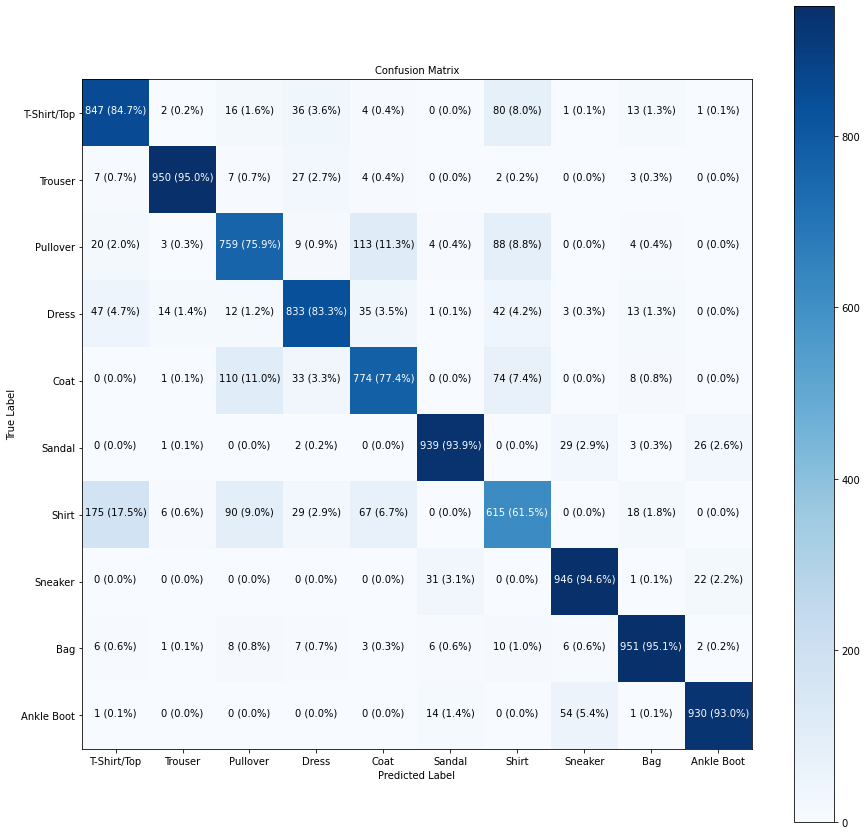

In [330]:
# Create a Human Readable Confusion Matrix
make_confusion_matrix(test_labels, y_preds, Class_Names)

# Visualize Data

# Create a Function
* Plot a random image
* Make a prediction on image
* Label the plot with the true label and the probabilities

In [331]:
train_data[0].shape

(28, 28)

In [332]:
output = train_data[0].reshape(1,28,28)
output.shape

(1, 28, 28)

In [333]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random iamge, plots it and labels it with a prediction and truth label
  """

  # Set up a random integer
  
  i = random.randint(0, len(images))

  #Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the predictioin is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color="red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
                                                     color=color)

In [334]:
y_prob = multiClassification_model_2.predict(test_data_normalized[0])
y_pred = tf.argmax(multiClassification_model_2.predict(test_data_normalized[0]), axis=1)
y_prob

1/1 [==============================] - 0s 34ms/step


array([[4.2513126e-09, 5.6351229e-10, 9.7804342e-10, 3.4009560e-09,
        1.1430941e-11, 1.7012259e-01, 3.0112041e-11, 1.4394414e-01,
        9.6777847e-05, 6.8583643e-01]], dtype=float32)

In [335]:
y_pred

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([9])>

In [336]:
y_prob.argmax()

9

In [337]:
Class_Names[y_prob.argmax()]

'Ankle Boot'

In [338]:
Class_Names[y_pred[0]]

'Ankle Boot'

In [339]:
y_prob.shape, tf.argmax(multiClassification_model_2.predict(test_data_normalized[0]), axis=1)

1/1 [==============================] - 0s 31ms/step


((1, 10), <tf.Tensor: shape=(1,), dtype=int64, numpy=array([9])>)

1/1 [==============================] - 0s 35ms/step


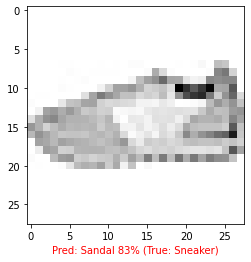

In [363]:
# Check out a random image as well as it's prediction
plot_random_image(model=multiClassification_model_2,
                  images=test_data_normalized,
                  true_labels=test_labels,
                  classes=Class_Names)

In [341]:
Class_Names

['T-Shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

# What Patterns is our model learning

In [364]:
multiClassification_model_2.layers

In [365]:
multiClassification_model_2.layers[1]

In [367]:
multiClassification_model_2.layers[1].get_weights()

[array([[-9.251943  ,  5.846594  ,  0.03375848, ...,  0.02605928,
          0.06671842,  9.598953  ],
        [ 1.806531  , -7.669778  ,  0.06221575, ..., -0.02058351,
         -0.0667454 , -2.7086535 ],
        [-9.056695  ,  6.3210096 , -0.07801647, ...,  0.03031953,
          0.01206874,  6.904095  ],
        ...,
        [-0.6970376 , -1.2808529 , -0.06281818, ...,  0.04615033,
          0.07708549,  0.57025504],
        [-0.33867702, -2.9793766 , -0.03360036, ...,  0.04884892,
         -0.07242218, -3.2364643 ],
        [-3.9137547 , -3.7693872 , -0.08503843, ..., -0.03772304,
          0.05336656,  4.913793  ]], dtype=float32),
 array([ 5.323068  ,  3.9399521 , -0.0190197 , -0.01801074, -0.01801397,
         1.8327739 ,  1.5968239 , -0.01799502, -0.02524135,  1.7639681 ],
       dtype=float32)]

In [368]:
# Get Patterns of a layer in our network
weights, biases = multiClassification_model_2.layers[1].get_weights()

#Shapes
weights, weights.shape

(array([[-9.251943  ,  5.846594  ,  0.03375848, ...,  0.02605928,
          0.06671842,  9.598953  ],
        [ 1.806531  , -7.669778  ,  0.06221575, ..., -0.02058351,
         -0.0667454 , -2.7086535 ],
        [-9.056695  ,  6.3210096 , -0.07801647, ...,  0.03031953,
          0.01206874,  6.904095  ],
        ...,
        [-0.6970376 , -1.2808529 , -0.06281818, ...,  0.04615033,
          0.07708549,  0.57025504],
        [-0.33867702, -2.9793766 , -0.03360036, ...,  0.04884892,
         -0.07242218, -3.2364643 ],
        [-3.9137547 , -3.7693872 , -0.08503843, ..., -0.03772304,
          0.05336656,  4.913793  ]], dtype=float32), (784, 10))

In [369]:
28 * 28

784

In [371]:
multiClassification_model_2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_51 (Dense)            (None, 10)                7850      
                                                                 
 dense_52 (Dense)            (None, 10)                110       
                                                                 
 dense_53 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [372]:
# Bias and biases shapes
biases, biases.shape

(array([ 5.323068  ,  3.9399521 , -0.0190197 , -0.01801074, -0.01801397,
         1.8327739 ,  1.5968239 , -0.01799502, -0.02524135,  1.7639681 ],
       dtype=float32), (10,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector is also initalized as zeros - Tensorflow Dense Layer

The bias vector determines how much the patterns with the corresponding weight vectors that should influence the next layer.

In [373]:
multiClassification_model_2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_51 (Dense)            (None, 10)                7850      
                                                                 
 dense_52 (Dense)            (None, 10)                110       
                                                                 
 dense_53 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [375]:
784 * 10 + 10

7850

In [376]:
10 * 10 + 10

110

In [377]:
10 * 10 + 10

110

##Each layer outputs to the next Layer
##Input Layer > Flatten > Dense(Hidden Layer) > Dense(Hidden Layer) > Dense(Outer Layer - Output Layer)

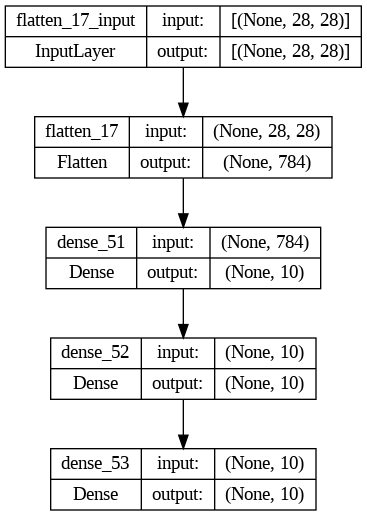

In [379]:
from tensorflow.keras.utils import plot_model
plot_model(multiClassification_model_2, show_shapes=True)